In [160]:
import pandas as pd
import pylab as pl

import statsmodels.api as sm

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Data Munging

## Importing and cleaning energy usage data (LL84) per building in NYC for 2015 (reported in 2016)

In [370]:
energy = pd.read_csv("nyc_benchmarking_disclosure_data_reported_in_2016.csv")
print(len(energy))
energy.head(1)

13223


,﻿Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,Street Number,...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method
0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,290.2,146.1,98052.0,98000.0,NaN,NaN,4/13/16 11:08 AM,NaN,NaN,NaN


In [372]:
energy.rename(columns={'NYC Borough, Block and Lot (BBL)':"BBL", \
                       'Reported NYC Building Identification Numbers (BINs)':'BIN', \
                       'Direct GHG Emissions (Metric Tons CO2e)':'directCO2e', \
                       'Indirect GHG Emissions (Metric Tons CO2e)':'indirectCO2e', \
                      'Total GHG Emissions (Metric Tons CO2e)':'Emissions(CO2e)', \
                      'Water Use (All Water Sources) (kgal)':'water_use', \
                      'Electricity Use - Grid Purchase (kBtu)':'grid_electricity(kBtu)'}, inplace=True)
energy.drop(['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)', 'Property GFA - Self-reported (ft²)', \
            'DEP Provided Water Use (kgal)', 'Automatic Water Benchmarking Eligible', 'Co-reported BBL Status', \
            'BBLs Co-reported', 'Weather Normalized Site Natural Gas Use (therms)', 'Reported Water Method', \
            'District Chilled Water Use (kBtu)', 'Natural Gas Use (kBtu)', 'District Steam Use (kBtu)', \
            'District Hot Water Use (kBtu)', 'Diesel #2 Use (kBtu)', 'DOF Benchmarking Submission Status',
       'Primary Property Type - Self Selected', 'water_use', 'Release Date',
       'List of All Property Use Types at Property',
       'Largest Property Use Type', 'Metered Areas (Energy)', 'Metered Areas  (Water)',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type', 'Order', 'Weather Normalized Site Electricity (kWh)',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type', '﻿Record Number', 'directCO2e', 'indirectCO2e',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)','Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)', \
              'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)','Property Name', 'grid_electricity(kBtu)', 'Occupancy',
       'Parent Property Id', 'Parent Property Name','Site EUI (kBtu/ft²)','Number of Buildings - Self-reported'], axis=1, inplace=True)
energy.head(1)

,BBL,BIN,Street Number,Street Name,Zip Code,Borough,Year Built,ENERGY STAR Score,Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Emissions(CO2e),DOF Property Floor Area (ft²)
0,1.003360e+09,1088884,15.0,BIALYSTOKER PLACE,10002.0,Manhattan,1982,87.0,74.4,115.7,Not Available,Not Available,436.3,98052.0


In [373]:
energy.columns

Index(['BBL', 'BIN', 'Street Number', 'Street Name', 'Zip Code', 'Borough',
       'Year Built', 'ENERGY STAR Score',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'Emissions(CO2e)',
       'DOF Property Floor Area (ft²)'],
      dtype='object')

In [374]:
energy = energy[energy["BIN"].str.contains(';')==False]
energy = energy[energy["BIN"].str.contains(',')==False]
energy = energy[energy["BIN"].str.contains(':')==False]
energy = energy[energy["BIN"].str.contains('-')==False]
len(energy)

10745

In [375]:
energy.sort(columns=['Emissions(CO2e)'], axis=0, ascending=False, inplace=True)
energy = energy[energy["BIN"] != '1040808']
energy.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,BBL,BIN,Street Number,Street Name,Zip Code,Borough,Year Built,ENERGY STAR Score,Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Emissions(CO2e),DOF Property Floor Area (ft²)
903,1.007390e+09,1013043,103.0,8 AVENUE,10011.0,Manhattan,1932,NaN,16887.0,20726.3,Not Available,Not Available,3221505.2,2161994.0
2936,1.012908e+09,1035762,2.0,EAST 55 STREET,10022.0,Manhattan,1904,1.0,88338.3,106404.3,Not Available,Not Available,2482353.9,323504.0
3391,1.013910e+09,Not Available,981.0,MADISON AVENUE,10075.0,Manhattan,1930,1.0,127429.9,153403.2,Not Available,Not Available,2470066.7,294142.0
1985,1.010110e+09,1023750,919.0,7 AVENUE,10019.0,Manhattan,1927,NaN,87342.8,105160.8,Not Available,Not Available,2320035.4,353996.0
3520,1.014158e+09,1043547,200.0,EAST 61 STREET,10065.0,Manhattan,1984,1.0,131121.4,157841.6,Not Available,Not Available,2193812.2,322852.0


In [ ]:
#energy['BIN'] = energy['BIN'].astype(float)

## Importing and cleaning PLUTO data for Manhattan (other borough files were too large for Jupyter)

In [381]:
MHpluto = pd.read_csv('MN_reduced.csv').dropna()
print(len(MHpluto))
MHpluto.columns

17478


Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea', 'Address',
       'ZoneDist1', 'BldgClass', 'LandUse', 'OwnerType', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotType', 'BsmtCode',
       'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot', 'YearBuilt',
       'BoroCode', 'BBL', 'Tract2010', 'XCoord', 'YCoord', 'PLUTOMapID',
       'Version'],
      dtype='object')

In [382]:
MHpluto.drop(['Borough', 'Block', 'Lot', 'CD', 'Council', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', \
              'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs', 'ExemptLand', \
              'ExemptTot', 'YearBuilt', 'Version', 'ZoneDist1', 'UnitsRes', 'UnitsTotal', 'BsmtCode', \
              'AssessLand', 'BoroCode', 'FireComp', 'PolicePrct', 'SchoolDist', 'NumFloors', \
             'LotType', 'BldgClass', 'LandUse', 'OwnerType'], axis=1, inplace=True)
MHpluto.head(3)

,CT2010,CB2010,ZipCode,HealthArea,Address,LotArea,BldgArea,AssessTot,BBL,Tract2010,XCoord,YCoord,PLUTOMapID
0,5.0,1018.0,10004.0,8100.0,1 GOVERNORS ISLAND,7736692,2725731,156510900,1000010010,5,979071.0,190225.0,1
1,1.0,1001.0,10004.0,8200.0,1 LIBERTY ISLAND,541886,541886,12197250,1000010101,1,971677.0,190636.0,1
5,9.0,1025.0,10004.0,7700.0,MARGINAL STREET,209215,280000,32193900,1000020001,9,980670.0,194440.0,1


In [383]:
energy.BBL = energy.BBL.astype(float)
MHpluto.BBL = MHpluto.BBL.astype(float)

In [9]:
type(MHpluto.BBL[1])

numpy.float64

In [10]:
type(energy.BBL[1])

numpy.float64

## Merging building energy and PLUTO data for Manhattan (on Borough-Block-Lot).

In [387]:
energyPLUTO = pd.merge(energy, MHpluto, on=['BBL'], how='inner')
#energyPLUTO.rename(columns={'Tract2010':'CT2010'}, inplace=True)
energyPLUTO['CT2010'] = energyPLUTO['CT2010'].astype(float)
print(len(energyPLUTO))
energyPLUTO.columns

1990


Index(['BBL', 'BIN', 'Street Number', 'Street Name', 'Zip Code', 'Borough',
       'Year Built', 'ENERGY STAR Score',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'Emissions(CO2e)',
       'DOF Property Floor Area (ft²)', 'CT2010', 'CB2010', 'ZipCode',
       'HealthArea', 'Address', 'LotArea', 'BldgArea', 'AssessTot',
       'Tract2010', 'XCoord', 'YCoord', 'PLUTOMapID'],
      dtype='object')

In [388]:
energyPLUTO.head()

,BBL,BIN,Street Number,Street Name,Zip Code,Borough,Year Built,ENERGY STAR Score,Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),...,ZipCode,HealthArea,Address,LotArea,BldgArea,AssessTot,Tract2010,XCoord,YCoord,PLUTOMapID
0,1.007390e+09,1013043,103.0,8 AVENUE,10011.0,Manhattan,1932,NaN,16887.0,20726.3,...,10011.0,5600.0,103 8 AVENUE,165200,2161994,389704050,83,983361.0,209374.0,1
1,1.013910e+09,Not Available,981.0,MADISON AVENUE,10075.0,Manhattan,1930,1.0,127429.9,153403.2,...,10021.0,4100.0,981 MADISON AVENUE,18803,294142,70865100,130,994500.0,221407.0,1
2,1.010110e+09,1023750,919.0,7 AVENUE,10019.0,Manhattan,1927,NaN,87342.8,105160.8,...,10019.0,4700.0,919 7 AVENUE,20083,353996,22344750,137,990067.0,218490.0,1
3,1.014158e+09,1043547,200.0,EAST 61 STREET,10065.0,Manhattan,1984,1.0,131121.4,157841.6,...,10065.0,4900.0,200 EAST 61 STREET,19983,251954,42912902,110,993782.0,217029.0,1
4,1.000680e+09,1001116,100.0,WILLIAM STREET,10038.0,Manhattan,1972,1.0,59092.0,71337.9,...,10038.0,7700.0,100 WILLIAM STREET,18513,377120,31847400,1502,982254.0,197346.0,1


In [389]:
energyPLUTO.to_csv(path_or_buf='energyPLUTO.csv')

## Counting the buildings per zip code (not really necessary)

In [335]:
grouped = energyPLUTO.groupby('Zip Code')
zips = pd.DataFrame(grouped['Zip Code'].apply(np.size))
zips.rename(columns={'Zip Code':'Buildings/Zip'}, inplace=True)
zips.head(3)

,Buildings/Zip
Zip Code,
10001.0,78
10002.0,20
10003.0,83


## Importing and cleaning asthma data for Manhattan zip codes from 2012-2014. Discharge rate is per 10,000 population.

In [114]:
MHasthma = pd.read_csv('MHasthma.csv')
print(len(MHasthma))
print(MHasthma.columns)
MHasthma.head(3)

43
Index(['﻿Zip Code', 'Discharges2012-2014', 'Discharge_Rate'], dtype='object')


,﻿Zip Code,Discharges2012-2014,Discharge_Rate
0,10001,159,21.9
1,10002,592,23.9
2,10003,130,7.7


In [115]:
MHasthma.rename(columns={'﻿Zip Code':'Zip Code'}, inplace=True)

In [116]:
type(MHasthma['Zip Code'][1])

numpy.int64

In [118]:
MHasthma['Zip Code'] = MHasthma['Zip Code'].astype(float)
MHasthma.head(2)

,Zip Code,Discharges2012-2014,Discharge_Rate
0,10001.0,159,21.9
1,10002.0,592,23.9


## Merging household income with building energy and PLUTO data (last two already merged)

In [361]:
# census data from:
# http://data.beta.nyc/dataset/median-household-income-2010-census-tracts/resource/5a7c26b5-f8b0-4a3f-87fe-56a9c2ff5692
census = pd.read_csv('medianhouseholdincomecensustract.csv')
print(len(census))

5296


005 - Bronx
047 - Kings (Brooklyn)
061 - New York (Manhattan)
081 - Queens
085 - Richmond (Staten Island)

In [362]:
census.drop(['REtax_ACS', 'AVG_TTL', 'LOCALNAME', 'MCR_ANNUAL',
       'MSMOC_TOT_', 'TAX_RET', 'Avg_TransC', 'REtaxperow', 'PERC_RENT', 'PERC_OWN', 'OHU_RENT', \
            'OHU_OWN', 'State', 'COUNTY'], axis=1, inplace=True)
census.rename(columns={'TRACTCE10':'CT2010'}, inplace=True) 
census['CT2010'] = census['CT2010'].astype(float)

In [363]:
census['COUNTYFP10'] = census['COUNTYFP10'].astype(str)
MHcensus = census[census['COUNTYFP10'] == '61']
print(len(MHcensus))
MHcensus.head()

288


,FID,STATEFP10,COUNTYFP10,CT2010,GEOID10,INTPTLAT10,INTPTLON10,HH_COUNT,MHI,MED_VAL,HOUSINGCOS,DISP_INC,energy_cos,Shape_Area
1699,1699,36,61,27100.0,36061027100,40.851939,-73.934291,2904,38125,536000,11068.7529,18670.89901,1764.860784,0.000021
1700,1700,36,61,12900.0,36061012900,40.765014,-73.999812,3354,76082,807900,21996.9303,29562.14132,1608.671016,0.000043
1701,1701,36,61,14401.0,36061014401,40.775249,-73.947552,2633,126518,668400,22181.4524,64418.82528,1718.090675,0.000008
1702,1702,36,61,9900.0,36061009900,40.752378,-74.008367,1091,122031,784700,26181.3474,58945.86916,1849.560190,0.000110
1703,1703,36,61,14601.0,36061014601,40.777192,-73.952161,2600,89846,713200,21611.7774,39691.01194,1415.971016,0.000008


In [393]:
incmnrgplt = pd.merge(energyPLUTO, census, on='CT2010', how='inner')
print(len(incmnrgplt))
incmnrgplt.columns

257


Index(['BBL', 'BIN', 'Street Number', 'Street Name', 'Zip Code', 'Borough',
       'Year Built', 'ENERGY STAR Score',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'Emissions(CO2e)',
       'DOF Property Floor Area (ft²)', 'CT2010', 'CB2010', 'ZipCode',
       'HealthArea', 'Address', 'LotArea', 'BldgArea', 'AssessTot',
       'Tract2010', 'XCoord', 'YCoord', 'PLUTOMapID', 'FID', 'STATEFP10',
       'COUNTYFP10', 'GEOID10', 'INTPTLAT10', 'INTPTLON10', 'HH_COUNT', 'MHI',
       'MED_VAL', 'HOUSINGCOS', 'DISP_INC', 'energy_cos', 'Shape_Area'],
      dtype='object')

In [392]:
incmnrgplt.to_csv(path_or_buf='incmnrgplt.csv')

# 1.1 How can we develop a metric for understanding energy performance and peer building comparison that accounts for the differences in building and occupancy characteristics that impact consumption?

# 2.1 What is the relationship between building energy use and public health, measured by the local asthma hospitalization rate?

### Merging just the building energy data with asthma data. Grouping building energy by zip code first. Leaving out PLUTO and Census for now.

### Using Weather Normalized Site EUI, because the environmental impacts of a building's electricity source don't affect the health of people around the building (as long as, like most buildings, it gets its electricity from the grid).

In [341]:
energy_Zip = energy.groupby(['Zip Code'])[['Weather Normalized Site EUI (kBtu/ft²)', 'Emissions(CO2e)'\
                                          , 'DOF Property Floor Area (ft²)']].sum()

In [342]:
energy_Zip['Total Site EUI'] = energy_Zip['Weather Normalized Site EUI (kBtu/ft²)'] * \
    energy_Zip['DOF Property Floor Area (ft²)']
energy_Zip['Zip Code'] = energy_Zip.index
x = len(energy_Zip)
energy_Zip.index = np.arange(0,x)
energy_Zip.head()

,Weather Normalized Site EUI (kBtu/ft²),Emissions(CO2e),DOF Property Floor Area (ft²),Total Site EUI,Zip Code
0,12612.0,285257.8,48767947.0,6.150613e+11,10001.0
1,2998.4,33170.0,4658910.0,1.396928e+10,10002.0
2,112037.2,2604604.4,30109217.0,3.373352e+12,10003.0
3,22145.1,549393.4,20278695.0,4.490737e+11,10004.0
4,78828.7,1356384.2,17566683.0,1.384759e+12,10005.0


In [343]:
MHasthmaZip = pd.merge(energy_Zip, MHasthma, on=['Zip Code'], how='inner')
MHasthmaZip['Discharges2012-2014'] = MHasthmaZip['Discharges2012-2014'].str.replace(',', '')
MHasthmaZip['Discharges2012-2014'] = MHasthmaZip['Discharges2012-2014'].astype(float)
MHasthmaZip['Zip Code'] = MHasthmaZip['Zip Code'].astype(int)
MHasthmaZip.to_csv(path_or_buf='MH_asthma_energy_per_zip.csv')
print(len(MHasthmaZip))
MHasthmaZip.head()

42


,Weather Normalized Site EUI (kBtu/ft²),Emissions(CO2e),DOF Property Floor Area (ft²),Total Site EUI,Zip Code,Discharges2012-2014,Discharge_Rate
0,12612.0,285257.8,48767947.0,6.150613e+11,10001,159.0,21.9
1,2998.4,33170.0,4658910.0,1.396928e+10,10002,592.0,23.9
2,112037.2,2604604.4,30109217.0,3.373352e+12,10003,130.0,7.7
3,22145.1,549393.4,20278695.0,4.490737e+11,10004,NaN,NaN
4,78828.7,1356384.2,17566683.0,1.384759e+12,10005,6.0,2.2


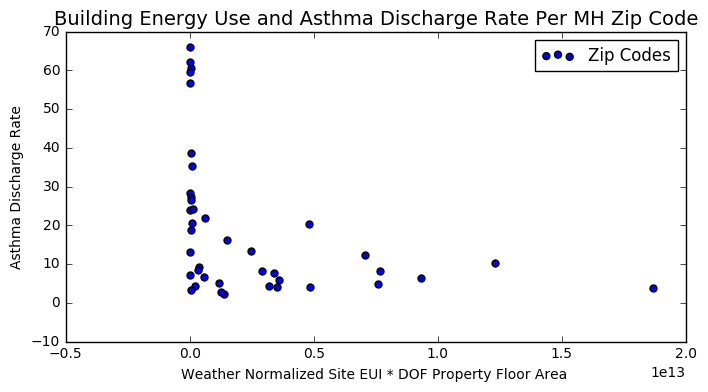

In [344]:
pl.figure(figsize=(8,4))
pl.scatter(MHasthmaZip['Total Site EUI'], MHasthmaZip['Discharge_Rate'], s=100, \
           cmap='bone', label=('Zip Codes'), marker=".")
pl.xlabel("Weather Normalized Site EUI * DOF Property Floor Area ", fontsize=10)
pl.ylabel("Asthma Discharge Rate", fontsize=10)
pl.title("Building Energy Use and Asthma Discharge Rate Per MH Zip Code", fontsize=14)
pl.legend()

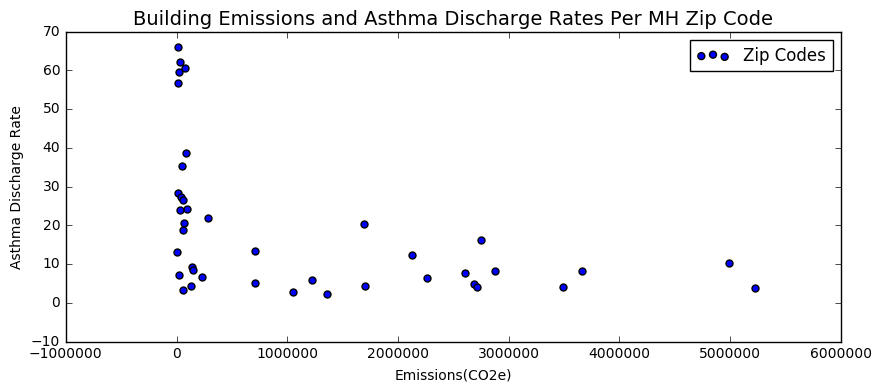

In [278]:
pl.figure(figsize=(10,4))
pl.scatter(MHasthmaZip['Emissions(CO2e)'], MHasthmaZip['Discharge_Rate'], s=100, \
           cmap='bone', label=('Zip Codes'), marker=".")
pl.xlabel("Emissions(CO2e)", fontsize=10)
pl.ylabel("Asthma Discharge Rate", fontsize=10)
pl.title("Building Emissions and Asthma Discharge Rates Per MH Zip Code", fontsize=14)
pl.legend()

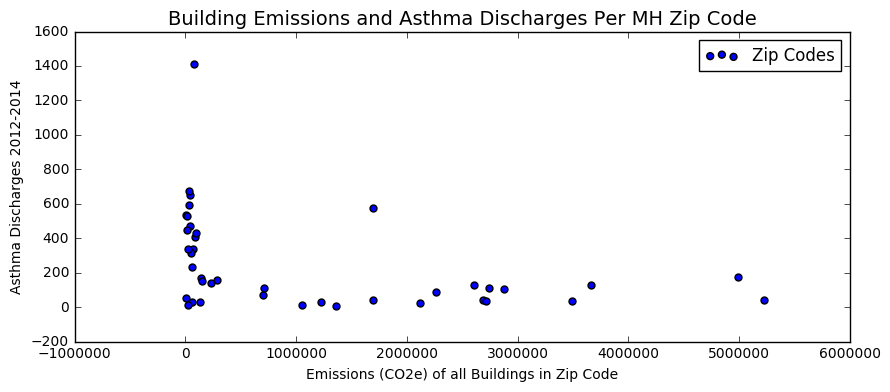

In [279]:
pl.figure(figsize=(10,4))
pl.scatter(MHasthmaZip['Emissions(CO2e)'], MHasthmaZip['Discharges2012-2014'], s=100, \
           cmap='bone', label=('Zip Codes'), marker=".")
pl.xlabel("Emissions (CO2e) of all Buildings in Zip Code", fontsize=10)
pl.ylabel("Asthma Discharges 2012-2014", fontsize=10)
pl.title("Building Emissions and Asthma Discharges Per MH Zip Code", fontsize=14)
pl.legend()

In [338]:
MHasthmaZip.sort(columns=['Emissions(CO2e)'], axis=0, ascending=False, inplace=True)
MHasthmaZip.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Weather Normalized Site EUI (kBtu/ft²),Emissions(CO2e),Zip Code,Discharges2012-2014,Discharge_Rate
18,258669.2,5224097.6,10022,40.0,3.9
13,248638.0,4987043.0,10016,173.0,10.2
9,95796.0,3665438.7,10011,127.0,8.1
39,232589.9,3493533.3,10075,36.0,4.1
16,109778.0,2873017.5,10019,105.0,8.1


In [346]:
MHasthmaZip.sort(columns=['Total Site EUI'], axis=0, ascending=False, inplace=True)
MHasthmaZip.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Weather Normalized Site EUI (kBtu/ft²),Emissions(CO2e),DOF Property Floor Area (ft²),Total Site EUI,Zip Code,Discharges2012-2014,Discharge_Rate
18,258669.2,5224097.6,72255102.0,1.869017e+13,10022,40.0,3.9
13,248638.0,4987043.0,49501910.0,1.230806e+13,10016,173.0,10.2
17,313883.7,2264591.6,29670140.0,9.312973e+12,10021,88.0,6.5
16,109778.0,2873017.5,69844072.0,7.667343e+12,10019,105.0,8.1
11,382273.9,2683988.5,19890994.0,7.603808e+12,10013,42.0,4.8


## 2.2 What is the relationship between neighborhood income and residential building energy use?